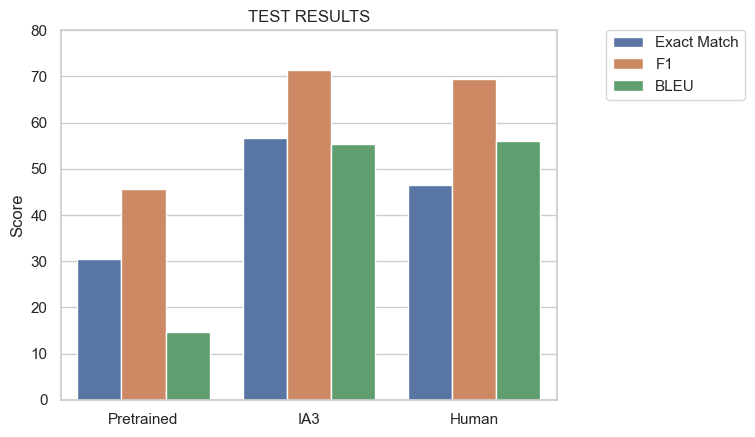

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("results.csv")
df = pd.melt(
    df,
    id_vars=["method"],
    value_vars=["em", "f1", "bleu"],
    var_name="metric",
    value_name="score",
)
df["metric"] = df["metric"].map({"em": "Exact Match", "f1": "F1", "bleu": "BLEU"})

sns.set_theme(style="whitegrid")
fig = sns.barplot(x="method", y="score", hue="metric", data=df)
fig.set(xlabel="", ylabel="Score")
fig
plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left", borderaxespad=0)
plt.ylim(0, 80)
plt.title("TEST RESULTS")
plt.show()
fig.figure.savefig(f"./figs/results.png", bbox_inches="tight", dpi=200)

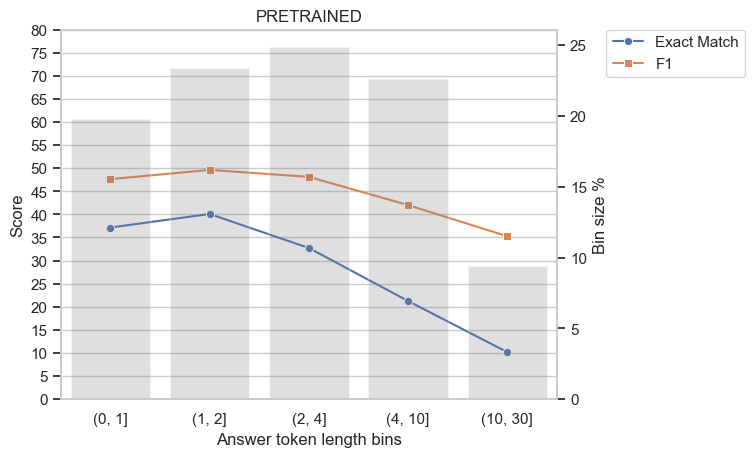

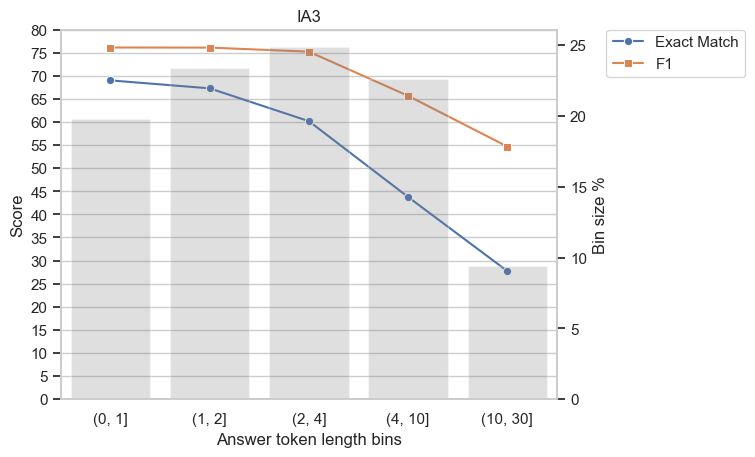

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bins = [
    {"label": "(0, 1]", "value": 829},
    {"label": "(1, 2]", "value": 978},
    {"label": "(2, 4]", "value": 1041},
    {"label": "(4, 10]", "value": 947},
    {"label": "(10, 30]", "value": 393},
]
total = 0
for _bin in bins:
    total += _bin["value"]

for _bin in bins:
    _bin["ratio"] = _bin["value"] / total * 100

bin_df = pd.DataFrame(bins)
bin_df = bin_df.reset_index(drop=True)

# read from csv
def plot(name):
    df = pd.read_csv(f"{name}.csv")

    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots()
    ax.set_ylim(0, 80)
    ax.set_yticks(range(0, 81, 5))
    ax.grid(axis="x")
    sns.lineplot(
        x="label", y="em", data=df, ax=ax, legend=True, label="Exact Match", marker="o"
    )
    sns.lineplot(x="label", y="f1", data=df, ax=ax, legend=True, label="F1", marker="s")
    ax.set(xlabel="Answer token length bins", ylabel="Score")
    plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left", borderaxespad=0)

    # plot bar chart of bin size in the same figure
    ax2 = ax.twinx()
    sns.barplot(x="label", y="ratio", data=bin_df, ax=ax2, color="grey", alpha=0.25)
    ax2.set(ylabel="Bin size %")
    ax2.grid(False)

    plt.title(name.upper())

    plt.show()
    fig.savefig(f"./figs/{name}-length.png", bbox_inches="tight", dpi=200)


names = ["pretrained", "ia3"]
for name in names:
    plot(name)

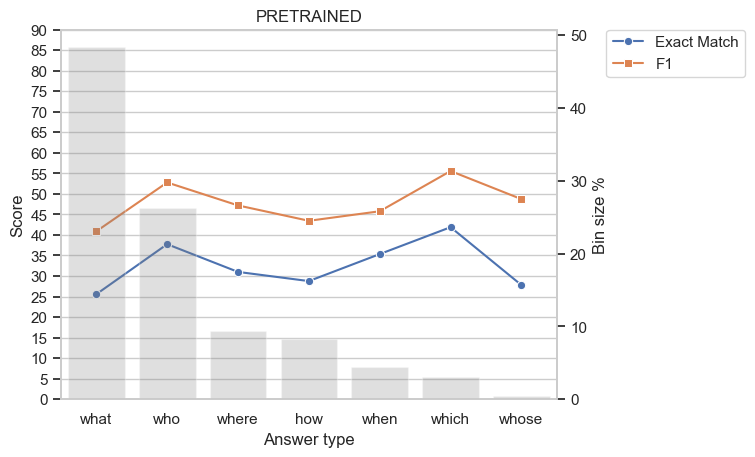

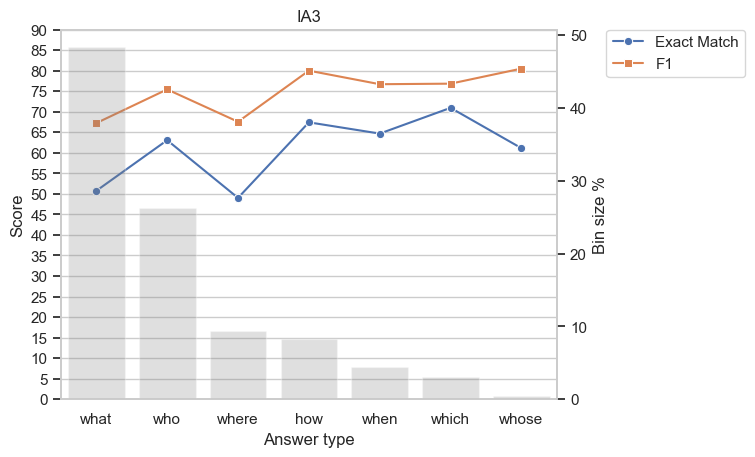

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bins = [
    {"label": "what", "value": 1843},
    {"label": "who", "value": 999},
    {"label": "where", "value": 355},
    {"label": "how", "value": 313},
    {"label": "when", "value": 167},
    {"label": "which", "value": 117},
    {"label": "whose", "value": 18},
]
total = 0
for _bin in bins:
    total += _bin["value"]

for _bin in bins:
    _bin["ratio"] = _bin["value"] / total * 100

bin_df = pd.DataFrame(bins)
bin_df = bin_df.reset_index(drop=True)

# read from csv
def plot(name):
    df = pd.read_csv(f"{name}-type.csv")

    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots()
    ax.set_ylim(0, 90)
    ax.set_yticks(range(0, 91, 5))
    ax.grid(axis="x")
    sns.lineplot(
        x="label", y="em", data=df, ax=ax, legend=True, label="Exact Match", marker="o"
    )
    sns.lineplot(x="label", y="f1", data=df, ax=ax, legend=True, label="F1", marker="s")
    ax.set(xlabel="Answer type", ylabel="Score")
    plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left", borderaxespad=0)

    # plot bar chart of bin size in the same figure
    ax2 = ax.twinx()
    sns.barplot(x="label", y="ratio", data=bin_df, ax=ax2, color="grey", alpha=0.25)
    ax2.set(ylabel="Bin size %")
    ax2.grid(False)

    plt.title(name.upper())

    plt.show()
    fig.savefig(f"./figs/{name}-type.png", bbox_inches="tight", dpi=200)


names = ["pretrained", "ia3"]
for name in names:
    plot(name)